In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cars.csv')
df.head()


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [4]:
df.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [9]:
df.columns = df.columns.str.strip() 
df['cubicinches'] = pd.to_numeric(df['cubicinches'])
df['weightlbs'] = pd.to_numeric(df['weightlbs'])
df.dtypes

mpg            float64
cylinders        int64
cubicinches    float64
hp               int64
weightlbs      float64
time-to-60       int64
year             int64
brand           object
dtype: object

In [10]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          256 non-null    float64
 1   cylinders    256 non-null    int64  
 2   cubicinches  256 non-null    float64
 3   hp           256 non-null    int64  
 4   weightlbs    256 non-null    float64
 5   time-to-60   256 non-null    int64  
 6   year         256 non-null    int64  
 7   brand        256 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 18.0+ KB


___

1.Can you find that there is improvement in mpg over the years ?


Year: 1971, Average MPG: 17.68
Year: 1972, Average MPG: 22.47
Year: 1973, Average MPG: 19.75
Year: 1974, Average MPG: 16.56
Year: 1975, Average MPG: 23.17
Year: 1976, Average MPG: 20.71
Year: 1977, Average MPG: 21.37
Year: 1978, Average MPG: 22.92
Year: 1979, Average MPG: 24.09
Year: 1980, Average MPG: 24.84
Year: 1981, Average MPG: 35.85
Year: 1982, Average MPG: 29.88
Year: 1983, Average MPG: 31.25


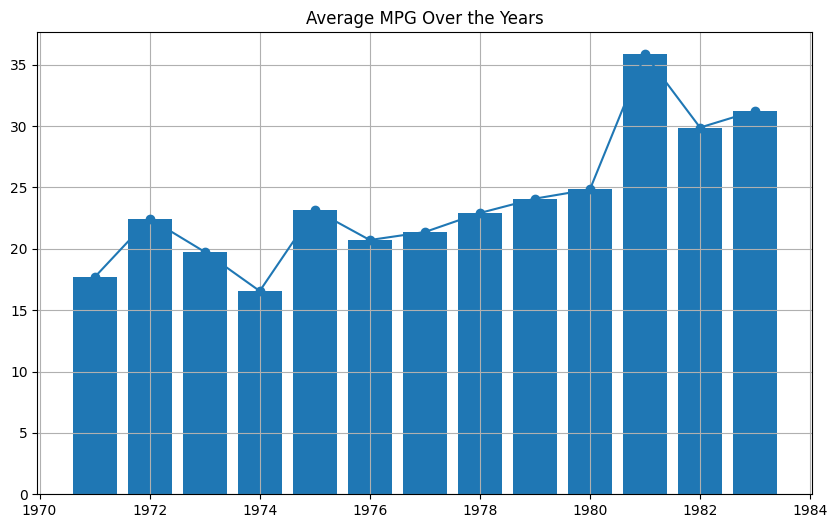

In [18]:

avg_mpg_per_year = df.groupby('year')['mpg'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_mpg_per_year.index, avg_mpg_per_year.values, marker='o')
plt.bar(avg_mpg_per_year.index, avg_mpg_per_year.values)
for year, mpg in avg_mpg_per_year.items():
    print(f"Year: {year}, Average MPG: {mpg:.2f}")
plt.title('Average MPG Over the Years')
plt.grid(True)
plt.show()

Yes, there is an improvement in average mpg over the years

___

2.Does cubicinches of a vehicle affects the vehicles time to reach 60 Miles per hour?


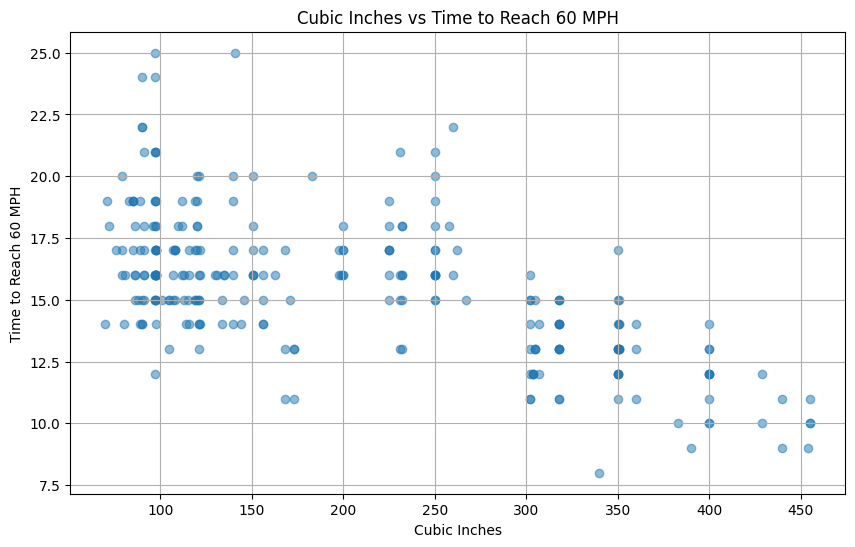

Correlation coefficient between cubic inches and time to reach 60 MPH: -0.61


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['cubicinches'], df['time-to-60'], alpha=0.5)
plt.title('Cubic Inches vs Time to Reach 60 MPH')
plt.xlabel('Cubic Inches')
plt.ylabel('Time to Reach 60 MPH')
plt.grid(True)
plt.show()
correlation = df['cubicinches'].corr(df['time-to-60'])
print(f"Correlation coefficient between cubic inches and time to reach 60 MPH: {correlation:.2f}")

it indicates that if we increase the engine size cubic inches then time to reach 60 mph decreases, it means car accelerates faster

____

Does a specific country prefer vehicles with more horse power ?


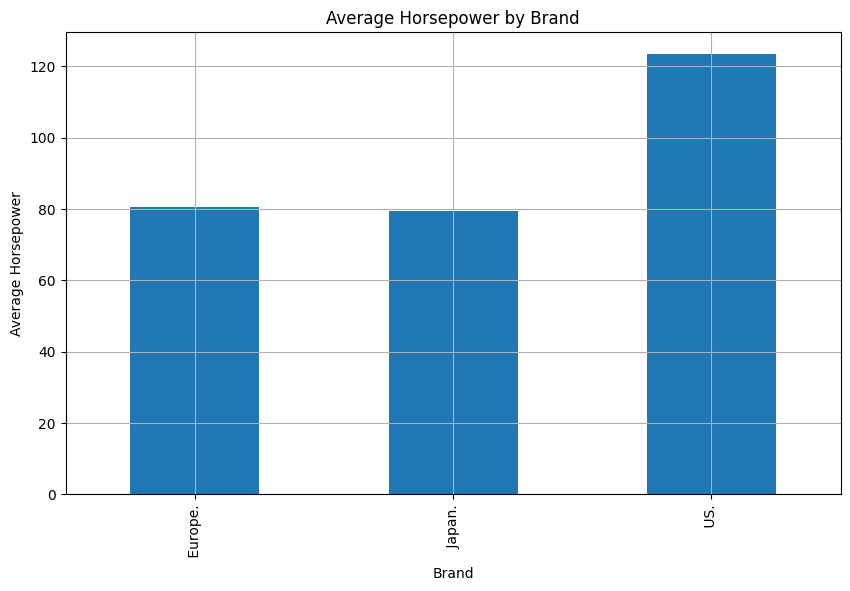

Brand:  Europe., Average Horsepower: 80.62
Brand:  Japan., Average Horsepower: 79.31
Brand:  US., Average Horsepower: 123.46


In [20]:
avg_hp_per_brand = df.groupby('brand')['hp'].mean()

plt.figure(figsize=(10, 6))
avg_hp_per_brand.plot(kind='bar')
plt.title('Average Horsepower by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Horsepower')
plt.grid(True)
plt.show()

for brand, hp in avg_hp_per_brand.items():
    print(f"Brand: {brand}, Average Horsepower: {hp:.2f}")

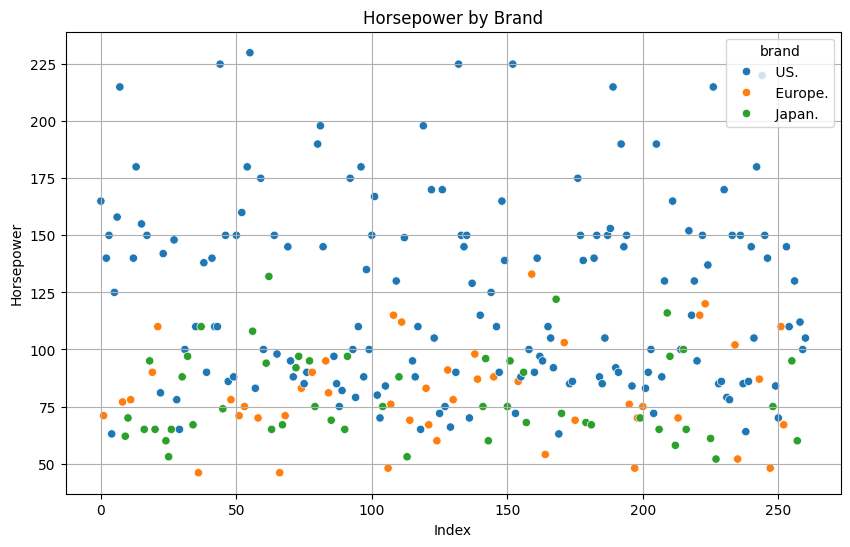

In [23]:
data_wo_year = df.drop(columns=['year'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_wo_year.index, y=data_wo_year.hp, hue=data_wo_year.brand)
plt.title('Horsepower by Brand')
plt.xlabel('Index')
plt.ylabel('Horsepower')
plt.grid(True)
plt.show()

From the analysis it seems that US vehicles mostly are with higher Horse power as compared to Europe and Japan.

___

 How does the horse power affects the average of the vehicle ?


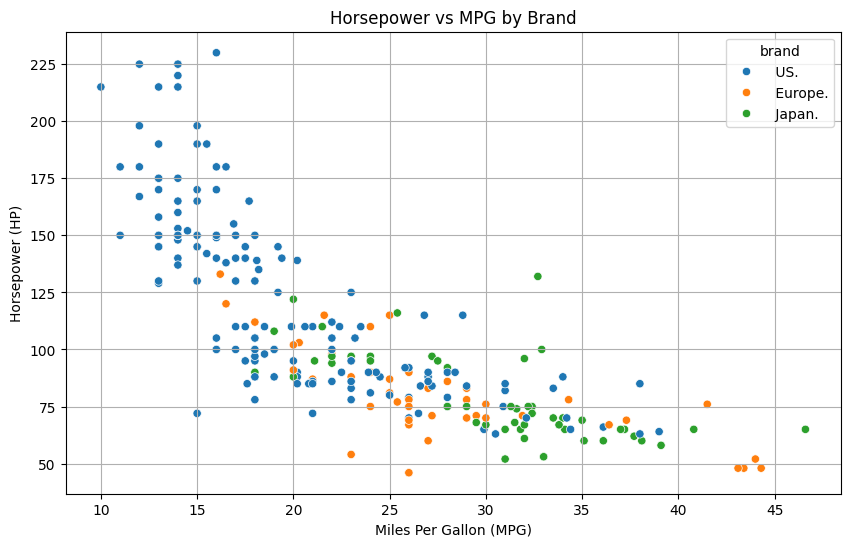

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_wo_year.mpg, y=data_wo_year.hp, hue=data_wo_year.brand)
plt.title('Horsepower vs MPG by Brand')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Horsepower (HP)')
plt.grid(True)
plt.show()

It is evident that horse power is in inverse proportion with Average of the vehicle. As the one goes on increasing the other one drops

____

What is the effect of number of cylinders on the mpg ?


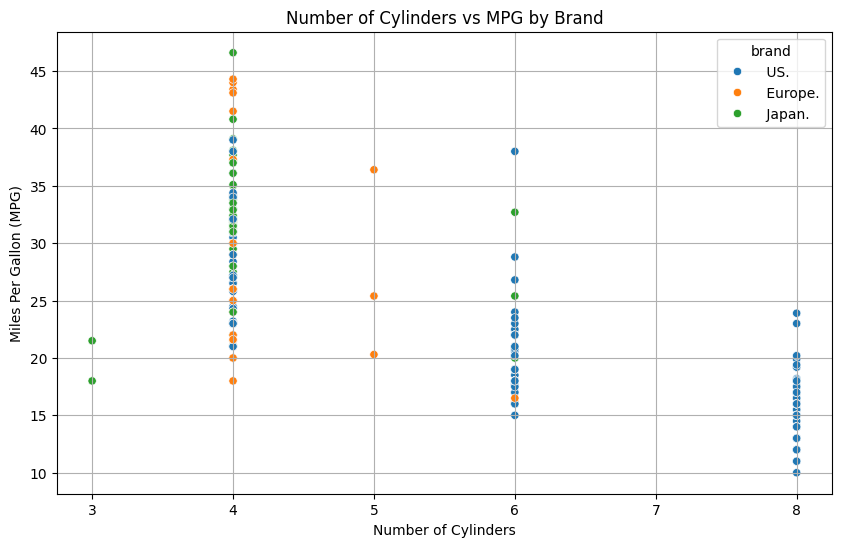

Correlation coefficient between number of cylinders and MPG: -0.78


In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_wo_year.cylinders, y=data_wo_year.mpg, hue=data_wo_year.brand)
plt.title('Number of Cylinders vs MPG by Brand')
plt.xlabel('Number of Cylinders')
plt.ylabel('Miles Per Gallon (MPG)')
plt.grid(True)
plt.show()

correlation_cyl_mpg = data_wo_year['cylinders'].corr(data_wo_year['mpg'])
print(f"Correlation coefficient between number of cylinders and MPG: {correlation_cyl_mpg:.2f}")

Vehicles with more cylinders have lower fuel efficiency (MPG). This is likely because engines with more cylinders tend to be larger and more powerful, consuming more fuel.

C:\Users\altaf\AppData\Local\Temp\ipykernel_14636\577730849.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_3d = data_wo_year.replace({" US.":0," Europe.":1," Japan.":2})


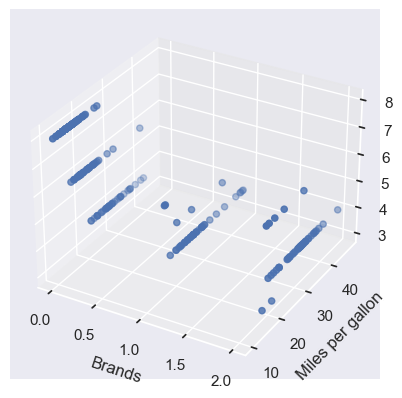

In [27]:
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = "darkgrid")
%matplotlib inline

# Creating figure
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

data_3d = data_wo_year.replace({" US.":0," Europe.":1," Japan.":2})

x = data_3d['brand']
y = data_3d['mpg']
z = data_3d['cylinders']

ax.set_xlabel("Brands")
ax.set_ylabel("Miles per gallon")
ax.set_zlabel("No of Cylinders")

ax.scatter(x, y,z)

plt.show()

___

# What relation between cubic inches , number of cylinders and horse power you can observe from the data ? 

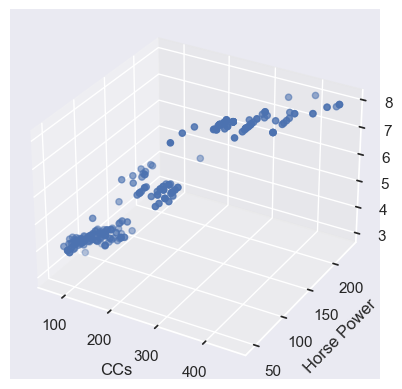

In [28]:
# What relation between cubic inches , number of cylinders and horse power you can observe from the data ? 

sns.set(style = "darkgrid")
%matplotlib inline

# Creating figure
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = data_3d['cubicinches']
y = data_3d['hp']
z = data_3d['cylinders']

ax.set_xlabel("CCs")
ax.set_ylabel("Horse Power")
ax.set_zlabel("No of Cylinders")

ax.scatter(x, y, z)

plt.show()

<Axes: xlabel='cubicinches', ylabel='hp'>

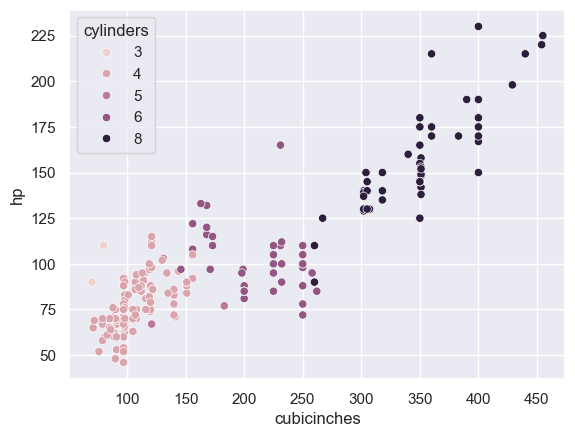

In [29]:
sns.scatterplot(x = data_wo_year.cubicinches ,y = data_wo_year.hp , hue = data_wo_year.cylinders )

It is evident that cubic inches , number of cylinders and horse power are in direct proportion with each other.

___

# How much proportion of the total records is occupied by vehicles with 8 cylinders ?

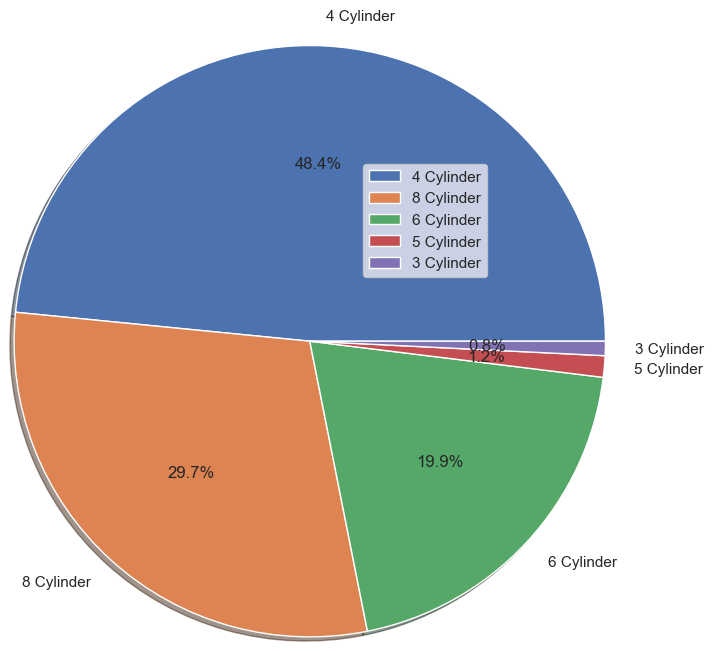

In [30]:
# How much proportion of the total records is occupied by vehicles with 8 cylinders ?

plt.pie(data_wo_year.cylinders.value_counts(),labels = ["4 Cylinder","8 Cylinder","6 Cylinder","5 Cylinder","3 Cylinder"],autopct='%1.1f%%',shadow = True,radius= 2)
plt.legend(loc = "upper right")

In [31]:
data_wo_year.cylinders.value_counts()

cylinders
4    124
8     76
6     51
5      3
3      2
Name: count, dtype: int64

Roughly around 30 % of the vehicles enlisted in the data are with 8 Cylinders.